This banknote authentication dataset provides data for distinguishing between genuine and forged/counterfeit banknotes. The dataset consists of features extracted from images of banknotes, where each image was processed using statistical techniques to capture important details for classification. The dataset can be used for binary classification tasks to determine whether a banknote is authentic or forged/counterfeit.

##Data Dictionary

Variance of Wavelet Transformed Image: Measures the dispersion of image values.

Skewness of Wavelet Transformed Image: Measures the asymmetry of the image value distribution.

Curtosis of Wavelet Transformed Image(K): Describes the "tailedness" of the image value distribution.

Entropy of Image: Measure the randomness in the image.

Class: The target integer variable indicating whether the banknote is genuine (1) or forged/counterfeit (0).

https://www.kaggle.com/datasets/alyabdelnaby/data-banknote-authentication

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
plt.rcParams['figure.figsize']=[7,4]
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix



In [2]:
df=pd.read_csv('/content/data_banknote_authentication.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [3]:
df.columns=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

df.columns

Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'], dtype='object')

In [4]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1373 non-null   float64
 1   Skewness  1373 non-null   float64
 2   Kurtosis  1373 non-null   float64
 3   Entropy   1373 non-null   float64
 4   Class     1373 non-null   float64
dtypes: float64(5)
memory usage: 53.8 KB


In [6]:
df.describe()

,Variance,Skewness,Kurtosis,Entropy,Class
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.841726,5.866907,4.308459,2.100247,0.496922
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.771300,-1.705100,-1.557200,-2.409900,0.000000
50%,0.495710,2.313400,0.616630,-0.586650,0.000000
75%,2.820900,6.814100,3.176900,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df['Class'].value_counts()

,count
Class,
0.000000,762
1.000000,610
0.444606,1


In [8]:
df[df['Class']>0.3]

,Variance,Skewness,Kurtosis,Entropy,Class
762,-1.397100,3.319100,-1.392700,-1.994800,1.000000
763,0.390120,-0.142790,-0.031994,0.350840,1.000000
764,-1.667700,-7.153500,7.892900,0.967650,1.000000
765,-3.848300,-12.804700,15.682400,-1.281000,1.000000
766,-3.568100,-8.213000,10.083000,0.967650,1.000000
...,...,...,...,...,...
1368,-1.388700,-4.877300,6.477400,0.341790,1.000000
1369,-3.750300,-13.458600,17.593200,-2.777100,1.000000
1370,-3.563700,-8.382700,12.393000,-1.282300,1.000000
1371,-2.541900,-0.658040,2.684200,1.195200,1.000000


In [9]:
df.drop(1372,axis=0,inplace=True)

In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,index,Variance,Skewness,Kurtosis,Entropy,Class
0,0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,4,0.32924,-4.4552,4.5718,-0.98880,0.0


In [12]:
df.drop('index',axis=1,inplace=True)

In [13]:
df.isna().sum()

,0
Variance,0
Skewness,0
Kurtosis,0
Entropy,0
Class,0


In [14]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0.0
1,4.54590,8.1674,-2.4586,-1.46210,0.0
2,3.86600,-2.6383,1.9242,0.10645,0.0
3,3.45660,9.5228,-4.0112,-3.59440,0.0
4,0.32924,-4.4552,4.5718,-0.98880,0.0


#EDA

In [15]:
df.groupby('Class')['Variance'].mean()

,Variance
Class,
0.0,2.276686
1.0,-1.868443


There is a lot of difference between Varinace averages of class 0 and 1. This can be an important feature for classification

In [16]:
df.groupby('Class')['Skewness'].mean()

,Skewness
Class,
0.0,4.256627
1.0,-0.993576


There is a lot of difference between the  skewness averages of Genuine banknotes(1) and Fake banknotes(0). This can be an important feature for classifying the data


In [17]:
df.groupby('Class')['Kurtosis'].mean()

,Kurtosis
Class,
0.0,0.796718
1.0,2.148271


There is a difference between class 0 and class 1 Kurtosis Averages so it can be a useful feature in differentiating the original from fake banknotes.

In [18]:
df.groupby('Class')['Entropy'].mean()

,Entropy
Class,
0.0,-1.147640
1.0,-1.246641


Entropy doesnt seem to have much of a difference between class 0 and class 1. It might not be as useful for classification


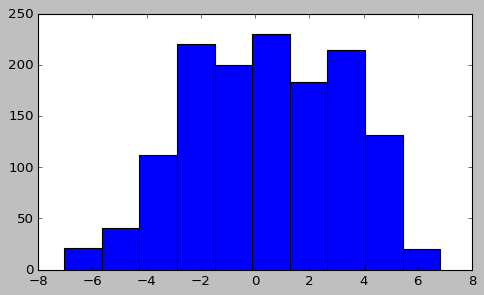

In [19]:
plt.hist(df['Variance'])
plt.show()

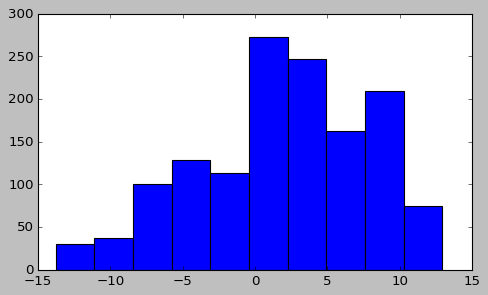

In [20]:
plt.hist(df['Skewness'])
plt.show()

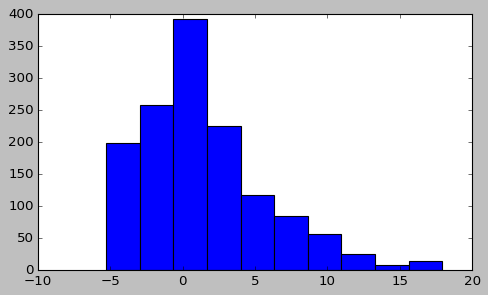

In [21]:
plt.hist(df['Kurtosis'])
plt.show()

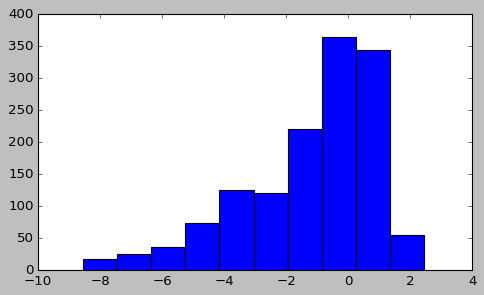

In [22]:
plt.hist(df['Entropy'])
plt.show()

- Variance data looks to be normally distributed
-Skewness data looks a bit left skewed
-Kurtosis and Entropy seem to be right skewed and left skewed resp.

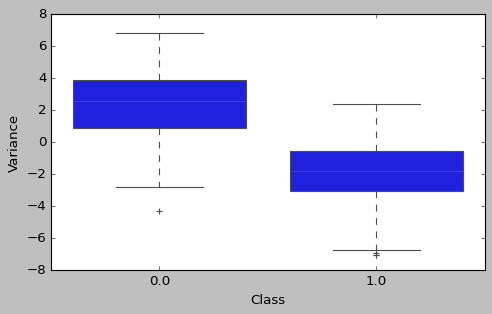

In [23]:
sns.boxplot(x='Class',y='Variance',data=df)
plt.show()

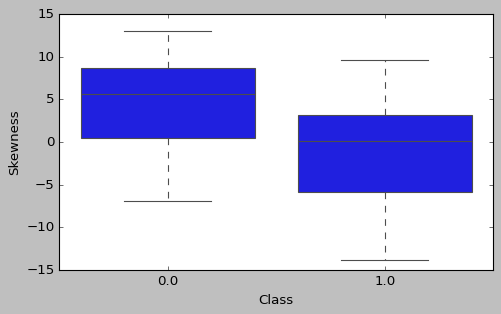

In [24]:
sns.boxplot(x='Class',y='Skewness',data=df)
plt.show()

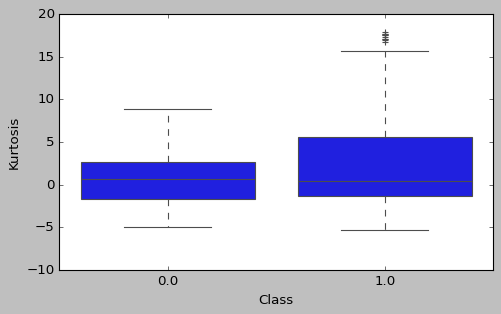

In [25]:
sns.boxplot(x='Class',y='Kurtosis',data=df)
plt.show()

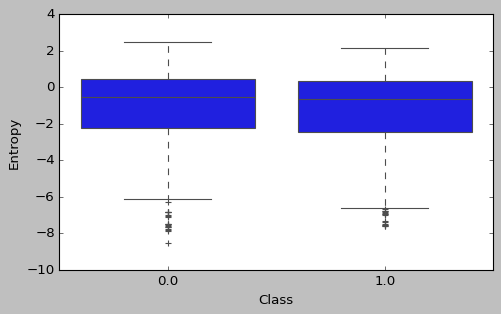

In [26]:
sns.boxplot(x='Class',y='Entropy',data=df)
plt.show()

- Class 1(real notes) in Variance are mostly negative
- Class 1 in Skewness also seem to be negative in nature
- Class 1 in Kutosis are going going to higher positive values where as Class 0 do not have high positive values
- Class 1 and Class 0 do not show any difference in Entropy

In [27]:
corr=df.corr()[['Class']].drop('Class')
corr

,Class
Variance,-0.724843
Skewness,-0.444688
Kurtosis,0.155883
Entropy,-0.023424


<Axes: >

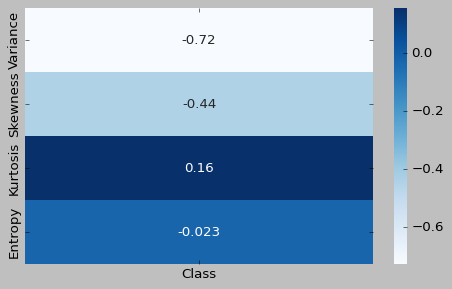

In [28]:
sns.heatmap(corr,annot=True,cmap='Blues')



*   Varinace has a highly negative correlation with class so it can be a useful feature for modelling
*   Skewness also has a high negative correlaton with class
* Kurtosis has a small positive correlation with class
* Entropy has a negligible amount of negative corraltion with class



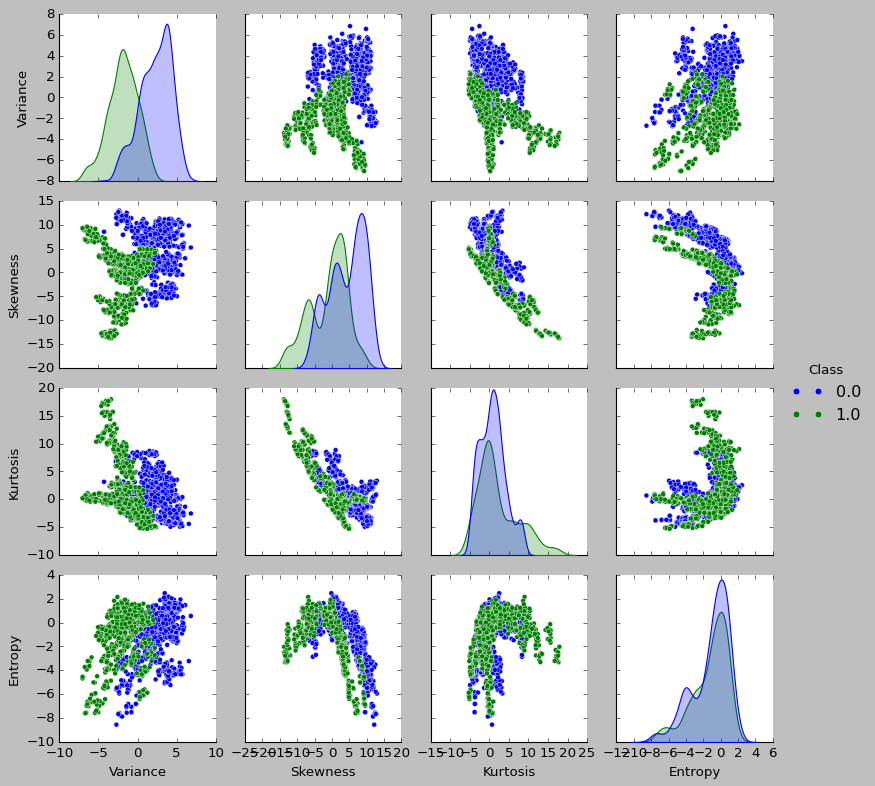

In [29]:
sns.pairplot(df,hue='Class')

- Variance with skewness shows a clear distinction with class
- Varinace with Kurtosis also shows a clear distinction with class with a bit of overlap
- Entropy with any other feature doesn't show any clear distinction between classes 0 and 1 as they overlap

#T-test

In [30]:
#t-test because this is a between two categories and continuous data
from scipy.stats import f_oneway
df.columns

Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'], dtype='object')

In [31]:
cols= ['Variance', 'Skewness', 'Kurtosis', 'Entropy']
cols

['Variance', 'Skewness', 'Kurtosis', 'Entropy']

In [32]:
def pv_output(x):
  if x<0.05:
    return 'Significant'
  else:
    return 'Not Significant'

In [33]:
for i in cols:
  c1= df[df['Class']==1][i]
  c0= df[df['Class']==0][i]
  #print(f_oneway(c1,c0))
  p=f_oneway(c1,c0)[1]
  print(f'{i} is {pv_output(p)}')

Variance is Significant
Skewness is Significant
Kurtosis is Significant
Entropy is Not Significant


- From this we can come to a conclusion that Entropy is not necessary for the model

------------------------------------------------------------------------------

In [34]:
X = df.drop(['Class','Entropy'],axis=1)
y = df['Class']

x_train,x_test,y_train,y_test = tts(X,y,test_size=0.2,
                                    random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
model.score(x_test,y_test)

0.9818181818181818

In [37]:
y_pred = model.predict(x_test)
print(precision_score(y_test,y_pred))

print(recall_score(y_test,y_pred))

print(f1_score(y_test,y_pred))

0.9765625
0.984251968503937
0.9803921568627452


In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[145,   3],
       [  2, 125]])

<Axes: >

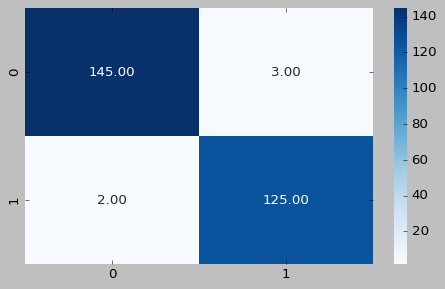

In [39]:
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.2f')

In [40]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0.

In [41]:
proba = model.predict_proba(x_test)[:,1]

#np.where(proba>0.5,1,0)

In [42]:
y_pred = np.where(proba>0.4,1,0)
confusion_matrix(y_test,y_pred)

array([[144,   4],
       [  1, 126]])

In [43]:
th = []
for i in range(0,11):
  th.append(i/10)
th


[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [44]:
scores = []
for i in th:
  y_pred = np.where(proba>i,1,0)
  p=precision_score(y_test,y_pred)
  r=recall_score(y_test,y_pred)
  scores.append((i,p,r))



In [45]:
summary = pd.DataFrame(scores,columns=['threshold','precision','recall'])

summary

,threshold,precision,recall
0,0.0,0.461818,1.000000
1,0.1,0.913669,1.000000
2,0.2,0.947761,1.000000
3,0.3,0.969466,1.000000
4,0.4,0.969231,0.992126
5,0.5,0.976562,0.984252
6,0.6,0.984252,0.984252
7,0.7,0.984000,0.968504
8,0.8,1.000000,0.929134
9,0.9,1.000000,0.811024


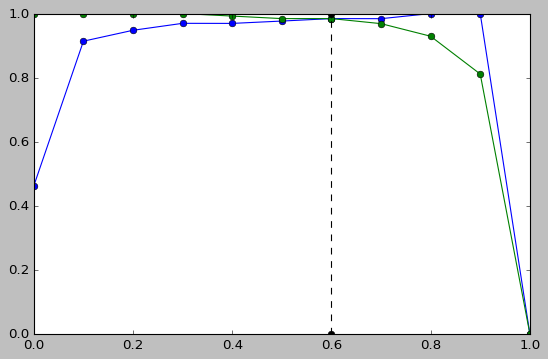

In [46]:
plt.figure(figsize=(8,5))
plt.plot(summary['threshold'],summary['precision'],marker = 'o')
plt.plot(summary['threshold'],summary['recall'],marker = 'o')
plt.axvline(0.6,color='k',marker='o',linestyle='--')

plt.show()